In [27]:
import numpy as np
import math
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1)) 
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * (np.sqrt(2. / layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters



In [29]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    if callable(activation):
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = activation(Z)
    elif isinstance(activation, basestring):
        if activation == "sigmoid":
            # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
            ### START CODE HERE ### (≈ 2 lines of code)
            Z, linear_cache = linear_forward(A_prev, W, b)
            A, activation_cache = sigmoid(Z)
            ### END CODE HERE ###

        elif activation == "relu":
            # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
            ### START CODE HERE ### (≈ 2 lines of code)
            Z, linear_cache = linear_forward(A_prev, W, b)
            A, activation_cache = relu(Z)
            ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward_with_regularization(X, parameters, hidden_activation="relu", output_activation="sigmoid"):
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,
                                            parameters["W" + str(l)],
                                            parameters["b" + str(l)],
                                            activation=hidden_activation)
#         print parameters["W" + str(l)].shape, parameters["b" + str(l)].shape
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A,
                                         parameters["W" + str(L)],
                                         parameters["b" + str(L)],
                                         activation=output_activation)
#     print parameters["W" + str(L)].shape, parameters["b" + str(L)].shape
    caches.append(cache)
    assert(AL.shape == (1, X.shape[1]))
    return AL, caches

In [30]:
def compute_cost_with_regularization(AL, Y, parameters, lambd):
    m = Y.shape[1]
    cross_entropy_cost = -1. / m * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log(1-AL)))
    L = len(parameters) // 2
    L2_regularization_cost = 0
    for l in range(1, L+1):
        L2_regularization_cost += np.sum(np.square(parameters["W" + str(l)]))
    L2_regularization_cost = 0.5 * m * lambd * L2_regularization_cost
    
    cost = cross_entropy_cost + L2_regularization_cost
    cost = np.squeeze(cost)
    return cost

In [31]:
def linear_backward_with_regularization(dZ, cache, lambd):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1. / m) * (np.dot(dZ, A_prev.T) + lambd * W)
    db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward_with_regularization(dA, cache, activation_backward, lambd = 0.1):
    linear_cache, activation_cache = cache
    if callable(activation_backward):
        dZ = activation_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
    elif isinstance(activation_backward, basestring):
        if activation_backward == "relu":
            ### START CODE HERE ### (≈ 2 lines of code)
            dZ = relu_backward(dA, activation_cache)
            dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
            ### END CODE HERE ###

        elif activation_backward == "sigmoid":
            ### START CODE HERE ### (≈ 2 lines of code)
            dZ = sigmoid_backward(dA, activation_cache)
            dA_prev, dW, db = linear_backward_with_regularization(dZ, linear_cache, lambd)
            ### END CODE HERE ###
    
    return dA_prev, dW, db

In [32]:
def L_model_backward_with_regularization(AL, Y, caches, hidden_activation = "relu", output_activation = "sigmoid", lambd = 0.1):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward_with_regularization(dAL, current_cache, output_activation, lambd)
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward_with_regularization(grads["dA" + str(l + 2)], current_cache, hidden_activation, lambd)
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads

In [33]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    ### END CODE HERE ###
    
    return v, s

# initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
        ### END CODE HERE ###
        
    return v

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(math.floor(m/mini_batch_size)) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [34]:
# GRADED FUNCTION: update_parameters

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
        
    return parameters


# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dW' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dW' + str(l+1)] / np.sqrt(s_corrected['dW' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
        ### END CODE HERE ###

    return parameters, v, s

In [35]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, optimizer = "gd", hidden_activation = "relu", output_activation = "sigmoid", lambd = 0.01, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, learning_rate = 0.0075, num_epochs = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the parameter update method, support "gd", "momentum", "adam"
    hidden_activation -- hidden layer activation function, support "relu", "sigmoid"
    output_activation -- output layer activation function, support "sigmoid"
    lambd -- L2 regularization
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    seed = 10
    t = 0
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_he(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    ### END CODE HERE ###
    
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
            ### START CODE HERE ### (≈ 1 line of code)
#             print minibatch_X.shape, len(parameters)
            AL, caches = L_model_forward_with_regularization(minibatch_X, parameters)
            ### END CODE HERE ###
            
#             print "------------compute cost-------------"
            # Compute cost.
            ### START CODE HERE ### (≈ 1 line of code)
            cost = compute_cost_with_regularization(AL, minibatch_Y, parameters, lambd)
            ### END CODE HERE ###

            # Backward propagation.
            ### START CODE HERE ### (≈ 1 line of code)
            grads = L_model_backward_with_regularization(AL, minibatch_Y, caches, hidden_activation, output_activation, lambd)
            ### END CODE HERE ###

            # Update parameters.
            ### START CODE HERE ### (≈ 1 line of code)
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
            ### END CODE HERE ###

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs

In [36]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


y = 0. It's a non-cat picture.
train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


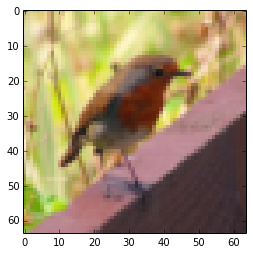

In [37]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


0.5 0.1
Cost after iteration 0: 275.323440
Cost after iteration 100: 110.680811
Cost after iteration 200: 77.212145
Cost after iteration 300: 66.032909
Cost after iteration 400: 65.030684
Cost after iteration 500: 60.694271
Cost after iteration 600: 64.010628
Cost after iteration 700: 52.008898
Cost after iteration 800: 47.178289
Cost after iteration 900: 46.874129
Cost after iteration 1000: 47.869184
Cost after iteration 1100: 44.868668
Cost after iteration 1200: 43.530454
Cost after iteration 1300: 44.620631
Cost after iteration 1400: 48.864324
Cost after iteration 1500: 49.295503
Cost after iteration 1600: 42.024855
Cost after iteration 1700: 27.623571
Cost after iteration 1800: 34.539235
Cost after iteration 1900: 35.201538
Cost after iteration 2000: 39.310507
Cost after iteration 2100: 40.847204
Cost after iteration 2200: 41.911441
Cost after iteration 2300: 44.947899
Cost after iteration 2400: 41.910993
Cost after iteration 2500: 43.975755
Cost after iteration 2600: 40.105423
Cos

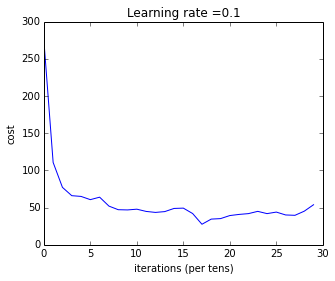

0.5 0.01
Cost after iteration 0: 276.517639
Cost after iteration 100: 252.824714
Cost after iteration 200: 237.536191
Cost after iteration 300: 223.686171
Cost after iteration 400: 207.991658
Cost after iteration 500: 192.186611
Cost after iteration 600: 182.546063
Cost after iteration 700: 168.616894
Cost after iteration 800: 156.315134
Cost after iteration 900: 145.552948
Cost after iteration 1000: 136.187455
Cost after iteration 1100: 128.125723
Cost after iteration 1200: 120.988872
Cost after iteration 1300: 114.222101
Cost after iteration 1400: 107.801275
Cost after iteration 1500: 101.827765
Cost after iteration 1600: 96.328364
Cost after iteration 1700: 91.337822
Cost after iteration 1800: 86.837376
Cost after iteration 1900: 82.774180
Cost after iteration 2000: 79.047081
Cost after iteration 2100: 75.675289
Cost after iteration 2200: 72.608292
Cost after iteration 2300: 71.766789
Cost after iteration 2400: 77.943897
Cost after iteration 2500: 78.919339
Cost after iteration 2600

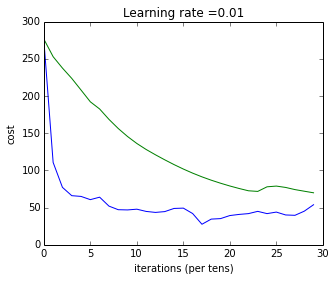

0.5 0.001
Cost after iteration 0: 276.704652
Cost after iteration 100: 274.023916
Cost after iteration 200: 272.160289
Cost after iteration 300: 270.825982
Cost after iteration 400: 270.094902
Cost after iteration 500: 269.481488
Cost after iteration 600: 269.326042
Cost after iteration 700: 268.884295
Cost after iteration 800: 268.665530
Cost after iteration 900: 268.293937
Cost after iteration 1000: 267.896365
Cost after iteration 1100: 267.155692
Cost after iteration 1200: 266.427173
Cost after iteration 1300: 265.459088
Cost after iteration 1400: 264.421877
Cost after iteration 1500: 263.253006
Cost after iteration 1600: 262.006428
Cost after iteration 1700: 260.639380
Cost after iteration 1800: 259.213913
Cost after iteration 1900: 257.724392
Cost after iteration 2000: 256.192044
Cost after iteration 2100: 254.595002
Cost after iteration 2200: 252.981729
Cost after iteration 2300: 251.321773
Cost after iteration 2400: 249.671418
Cost after iteration 2500: 247.966451
Cost after ite

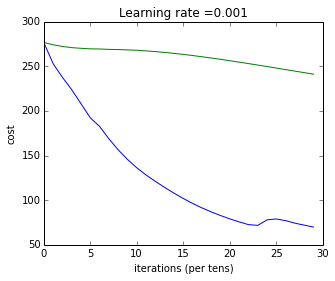

0.5 0.0001
Cost after iteration 0: 276.794096
Cost after iteration 100: 276.363584
Cost after iteration 200: 276.060789
Cost after iteration 300: 275.772379
Cost after iteration 400: 275.490817
Cost after iteration 500: 275.188887
Cost after iteration 600: 274.898157
Cost after iteration 700: 274.612893
Cost after iteration 800: 274.329538
Cost after iteration 900: 274.057964
Cost after iteration 1000: 273.775155
Cost after iteration 1100: 273.492701
Cost after iteration 1200: 273.217990
Cost after iteration 1300: 272.945120
Cost after iteration 1400: 272.661542
Cost after iteration 1500: 272.387388
Cost after iteration 1600: 272.120394
Cost after iteration 1700: 271.847363
Cost after iteration 1800: 271.585609
Cost after iteration 1900: 271.285688
Cost after iteration 2000: 271.070565
Cost after iteration 2100: 270.779962
Cost after iteration 2200: 270.524189
Cost after iteration 2300: 270.237410
Cost after iteration 2400: 270.003152
Cost after iteration 2500: 269.763846
Cost after it

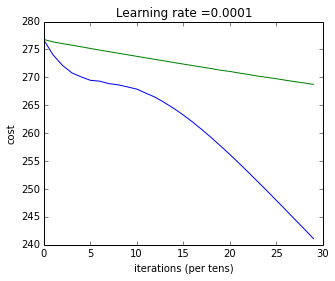

0.5 1e-05
Cost after iteration 0: 276.805113
Cost after iteration 100: 276.657555
Cost after iteration 200: 276.605099
Cost after iteration 300: 276.576223
Cost after iteration 400: 276.561466
Cost after iteration 500: 276.521037
Cost after iteration 600: 276.479102
Cost after iteration 700: 276.456215
Cost after iteration 800: 276.424295
Cost after iteration 900: 276.398946
Cost after iteration 1000: 276.369854
Cost after iteration 1100: 276.337806
Cost after iteration 1200: 276.312138
Cost after iteration 1300: 276.269232
Cost after iteration 1400: 276.251177
Cost after iteration 1500: 276.213293
Cost after iteration 1600: 276.189695
Cost after iteration 1700: 276.154505
Cost after iteration 1800: 276.124718
Cost after iteration 1900: 276.095072
Cost after iteration 2000: 276.071403
Cost after iteration 2100: 276.042547
Cost after iteration 2200: 276.012600
Cost after iteration 2300: 275.972633
Cost after iteration 2400: 275.956782
Cost after iteration 2500: 275.925464
Cost after ite

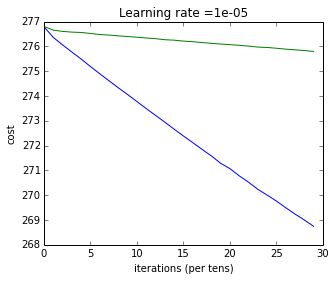

0.1 0.1
Cost after iteration 0: 55.820541
Cost after iteration 100: 50.118859
Cost after iteration 200: 49.585806
Cost after iteration 300: 50.625381
Cost after iteration 400: 54.624388
Cost after iteration 500: 52.055535
Cost after iteration 600: 47.432125
Cost after iteration 700: 44.786693
Cost after iteration 800: 46.017055
Cost after iteration 900: 45.785225
Cost after iteration 1000: 46.865021
Cost after iteration 1100: 48.077465
Cost after iteration 1200: 49.749589
Cost after iteration 1300: 49.623135
Cost after iteration 1400: 45.469688
Cost after iteration 1500: 38.451657
Cost after iteration 1600: 32.558719
Cost after iteration 1700: 28.823093
Cost after iteration 1800: 26.252229
Cost after iteration 1900: 22.338942
Cost after iteration 2000: 19.242544
Cost after iteration 2100: 16.403325
Cost after iteration 2200: 14.827032
Cost after iteration 2300: 13.657495
Cost after iteration 2400: 13.593405
Cost after iteration 2500: 20.390052
Cost after iteration 2600: 26.824550
Cost 

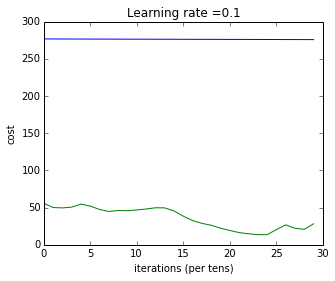

0.1 0.01
Cost after iteration 0: 55.882084
Cost after iteration 100: 55.407657
Cost after iteration 200: 56.093240
Cost after iteration 300: 56.686990
Cost after iteration 400: 56.688263
Cost after iteration 500: 55.900146
Cost after iteration 600: 55.254466
Cost after iteration 700: 54.565924
Cost after iteration 800: 55.093872
Cost after iteration 900: 55.583470
Cost after iteration 1000: 56.462956
Cost after iteration 1100: 55.699989
Cost after iteration 1200: 54.979329
Cost after iteration 1300: 53.901734
Cost after iteration 1400: 52.998970
Cost after iteration 1500: 52.092908
Cost after iteration 1600: 51.194889
Cost after iteration 1700: 50.317670
Cost after iteration 1800: 49.454623
Cost after iteration 1900: 48.608707
Cost after iteration 2000: 47.768950
Cost after iteration 2100: 46.953221
Cost after iteration 2200: 46.148515
Cost after iteration 2300: 45.352215
Cost after iteration 2400: 44.584757
Cost after iteration 2500: 44.053907
Cost after iteration 2600: 43.075414
Cost

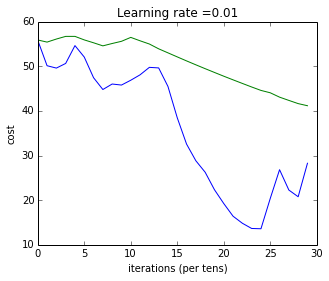

0.1 0.001
Cost after iteration 0: 55.934194
Cost after iteration 100: 55.780495
Cost after iteration 200: 55.842404
Cost after iteration 300: 55.977389
Cost after iteration 400: 56.270325
Cost after iteration 500: 56.432586
Cost after iteration 600: 56.909406
Cost after iteration 700: 57.077014
Cost after iteration 800: 57.495809
Cost after iteration 900: 57.826301
Cost after iteration 1000: 58.201838
Cost after iteration 1100: 58.395981
Cost after iteration 1200: 58.680871
Cost after iteration 1300: 58.830780
Cost after iteration 1400: 59.004247
Cost after iteration 1500: 59.145178
Cost after iteration 1600: 59.277709
Cost after iteration 1700: 59.371453
Cost after iteration 1800: 59.455720
Cost after iteration 1900: 59.520572
Cost after iteration 2000: 59.579080
Cost after iteration 2100: 59.608646
Cost after iteration 2200: 59.641978
Cost after iteration 2300: 59.655582
Cost after iteration 2400: 59.679598
Cost after iteration 2500: 59.671872
Cost after iteration 2600: 59.666727
Cos

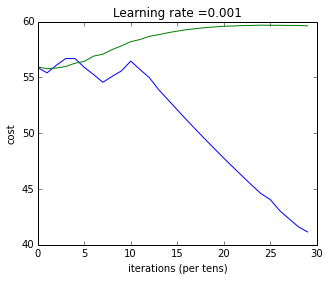

0.1 0.0001
Cost after iteration 0: 56.004725
Cost after iteration 100: 55.874115
Cost after iteration 200: 55.854419
Cost after iteration 300: 55.845888
Cost after iteration 400: 55.841977
Cost after iteration 500: 55.816117
Cost after iteration 600: 55.799768
Cost after iteration 700: 55.787641
Cost after iteration 800: 55.776117
Cost after iteration 900: 55.774983
Cost after iteration 1000: 55.761332
Cost after iteration 1100: 55.746788
Cost after iteration 1200: 55.738604
Cost after iteration 1300: 55.730839
Cost after iteration 1400: 55.711962
Cost after iteration 1500: 55.700665
Cost after iteration 1600: 55.695494
Cost after iteration 1700: 55.682788
Cost after iteration 1800: 55.680650
Cost after iteration 1900: 55.638160
Cost after iteration 2000: 55.680094
Cost after iteration 2100: 55.644215
Cost after iteration 2200: 55.642806
Cost after iteration 2300: 55.607520
Cost after iteration 2400: 55.626169
Cost after iteration 2500: 55.637582
Cost after iteration 2600: 55.616935
Co

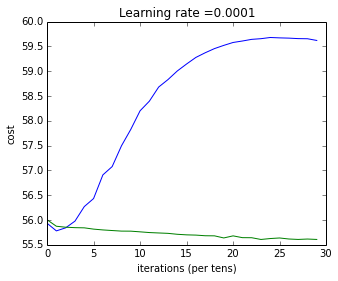

0.1 1e-05
Cost after iteration 0: 56.013534
Cost after iteration 100: 55.903260
Cost after iteration 200: 55.882028
Cost after iteration 300: 55.883083
Cost after iteration 400: 55.897726
Cost after iteration 500: 55.886428
Cost after iteration 600: 55.873430
Cost after iteration 700: 55.879320
Cost after iteration 800: 55.876062
Cost after iteration 900: 55.879307
Cost after iteration 1000: 55.878710
Cost after iteration 1100: 55.875157
Cost after iteration 1200: 55.877923
Cost after iteration 1300: 55.863375
Cost after iteration 1400: 55.873709
Cost after iteration 1500: 55.864113
Cost after iteration 1600: 55.868802
Cost after iteration 1700: 55.861837
Cost after iteration 1800: 55.860255
Cost after iteration 1900: 55.858792
Cost after iteration 2000: 55.863279
Cost after iteration 2100: 55.862530
Cost after iteration 2200: 55.860660
Cost after iteration 2300: 55.848711
Cost after iteration 2400: 55.860928
Cost after iteration 2500: 55.857611
Cost after iteration 2600: 55.849786
Cos

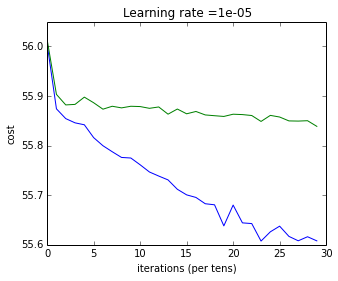

0.05 0.1
Cost after iteration 0: 28.266830
Cost after iteration 100: 27.903140
Cost after iteration 200: 28.658953
Cost after iteration 300: 28.801890
Cost after iteration 400: 28.426544
Cost after iteration 500: 28.298446
Cost after iteration 600: 28.827803
Cost after iteration 700: 27.877550
Cost after iteration 800: 28.461931
Cost after iteration 900: 28.887611
Cost after iteration 1000: 28.039699
Cost after iteration 1100: 29.513038
Cost after iteration 1200: 29.030190
Cost after iteration 1300: 27.597236
Cost after iteration 1400: 27.622061
Cost after iteration 1500: 28.561862
Cost after iteration 1600: 29.597266
Cost after iteration 1700: 28.874900
Cost after iteration 1800: 28.697195
Cost after iteration 1900: 26.263271
Cost after iteration 2000: 23.896714
Cost after iteration 2100: 23.469442
Cost after iteration 2200: 22.004691
Cost after iteration 2300: 20.989314
Cost after iteration 2400: 19.906831
Cost after iteration 2500: 18.620249
Cost after iteration 2600: 18.279890
Cost

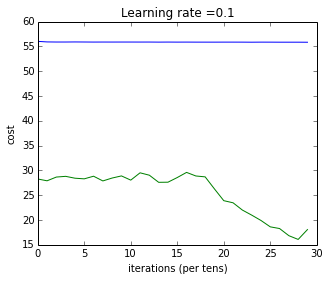

0.05 0.01
Cost after iteration 0: 28.291001
Cost after iteration 100: 28.280583
Cost after iteration 200: 28.720808
Cost after iteration 300: 29.109782
Cost after iteration 400: 29.946007
Cost after iteration 500: 30.123785
Cost after iteration 600: 30.083666
Cost after iteration 700: 29.971601
Cost after iteration 800: 29.834603
Cost after iteration 900: 29.676133
Cost after iteration 1000: 29.532365
Cost after iteration 1100: 29.390453
Cost after iteration 1200: 29.280186
Cost after iteration 1300: 29.195697
Cost after iteration 1400: 29.090739
Cost after iteration 1500: 28.946042
Cost after iteration 1600: 28.775102
Cost after iteration 1700: 28.587263
Cost after iteration 1800: 28.386089
Cost after iteration 1900: 28.176882
Cost after iteration 2000: 27.962571
Cost after iteration 2100: 27.744731
Cost after iteration 2200: 27.524036
Cost after iteration 2300: 27.301478
Cost after iteration 2400: 27.080787
Cost after iteration 2500: 26.857883
Cost after iteration 2600: 26.636795
Cos

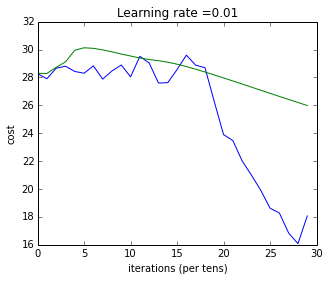

0.05 0.001
Cost after iteration 0: 28.336722
Cost after iteration 100: 28.236315
Cost after iteration 200: 28.281794
Cost after iteration 300: 28.335238
Cost after iteration 400: 28.499394
Cost after iteration 500: 28.499517
Cost after iteration 600: 28.805749
Cost after iteration 700: 28.789618
Cost after iteration 800: 29.047865
Cost after iteration 900: 29.223994
Cost after iteration 1000: 29.474049
Cost after iteration 1100: 29.544334
Cost after iteration 1200: 29.728112
Cost after iteration 1300: 29.801493
Cost after iteration 1400: 29.913254
Cost after iteration 1500: 30.007126
Cost after iteration 1600: 30.101958
Cost after iteration 1700: 30.174405
Cost after iteration 1800: 30.246578
Cost after iteration 1900: 30.303459
Cost after iteration 2000: 30.362251
Cost after iteration 2100: 30.400562
Cost after iteration 2200: 30.446736
Cost after iteration 2300: 30.478191
Cost after iteration 2400: 30.523503
Cost after iteration 2500: 30.542547
Cost after iteration 2600: 30.567095
Co

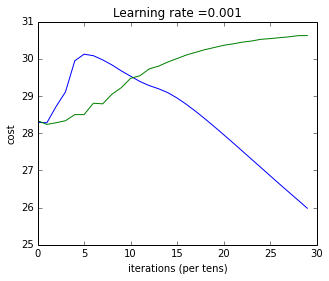

0.05 0.0001
Cost after iteration 0: 28.405937
Cost after iteration 100: 28.286583
Cost after iteration 200: 28.276079
Cost after iteration 300: 28.276370
Cost after iteration 400: 28.281036
Cost after iteration 500: 28.263595
Cost after iteration 600: 28.255486
Cost after iteration 700: 28.251479
Cost after iteration 800: 28.247926
Cost after iteration 900: 28.254642
Cost after iteration 1000: 28.248695
Cost after iteration 1100: 28.241746
Cost after iteration 1200: 28.241012
Cost after iteration 1300: 28.240534
Cost after iteration 1400: 28.228946
Cost after iteration 1500: 28.224685
Cost after iteration 1600: 28.226493
Cost after iteration 1700: 28.220608
Cost after iteration 1800: 28.225217
Cost after iteration 1900: 28.189232
Cost after iteration 2000: 28.237658
Cost after iteration 2100: 28.208000
Cost after iteration 2200: 28.212794
Cost after iteration 2300: 28.183376
Cost after iteration 2400: 28.208104
Cost after iteration 2500: 28.225306
Cost after iteration 2600: 28.210127
C

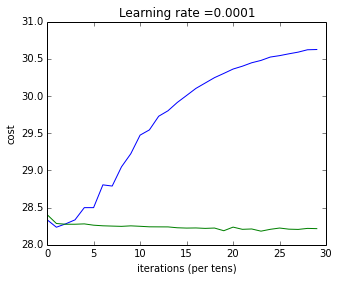

0.05 1e-05
Cost after iteration 0: 28.414575
Cost after iteration 100: 28.306336
Cost after iteration 200: 28.286382
Cost after iteration 300: 28.288554
Cost after iteration 400: 28.304249
Cost after iteration 500: 28.293969
Cost after iteration 600: 28.281963
Cost after iteration 700: 28.288830
Cost after iteration 800: 28.286533
Cost after iteration 900: 28.290726
Cost after iteration 1000: 28.291072
Cost after iteration 1100: 28.288460
Cost after iteration 1200: 28.292160
Cost after iteration 1300: 28.278532
Cost after iteration 1400: 28.289801
Cost after iteration 1500: 28.281116
Cost after iteration 1600: 28.286725
Cost after iteration 1700: 28.280670
Cost after iteration 1800: 28.279992
Cost after iteration 1900: 28.279436
Cost after iteration 2000: 28.284824
Cost after iteration 2100: 28.284970
Cost after iteration 2200: 28.283992
Cost after iteration 2300: 28.272927
Cost after iteration 2400: 28.286037
Cost after iteration 2500: 28.283606
Cost after iteration 2600: 28.276653
Co

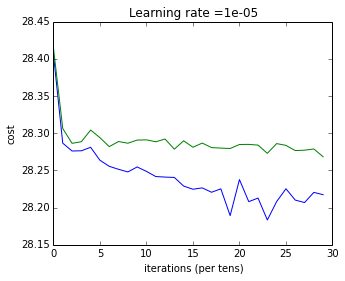

0.01 0.1
Cost after iteration 0: 6.205290
Cost after iteration 100: 6.609570
Cost after iteration 200: 7.176834
Cost after iteration 300: 7.634771
Cost after iteration 400: 8.152650
Cost after iteration 500: 8.328722
Cost after iteration 600: 8.684209
Cost after iteration 700: 9.157868
Cost after iteration 800: 8.761722
Cost after iteration 900: 8.520505
Cost after iteration 1000: 8.543591
Cost after iteration 1100: 8.334638
Cost after iteration 1200: 8.077076
Cost after iteration 1300: 8.177678
Cost after iteration 1400: 8.102454
Cost after iteration 1500: 8.330850
Cost after iteration 1600: 7.988470
Cost after iteration 1700: 7.633183
Cost after iteration 1800: 7.930195
Cost after iteration 1900: 8.223732
Cost after iteration 2000: 7.911114
Cost after iteration 2100: 8.254647
Cost after iteration 2200: 8.641049
Cost after iteration 2300: 8.786770
Cost after iteration 2400: 8.550263
Cost after iteration 2500: 9.043702
Cost after iteration 2600: 8.906643
Cost after iteration 2700: 8.54

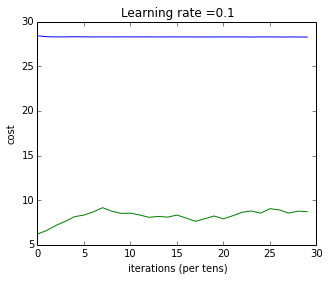

0.01 0.01
Cost after iteration 0: 6.216272
Cost after iteration 100: 6.141316
Cost after iteration 200: 6.060485
Cost after iteration 300: 6.096698
Cost after iteration 400: 6.950663
Cost after iteration 500: 6.280615
Cost after iteration 600: 6.280805
Cost after iteration 700: 6.306231
Cost after iteration 800: 6.338089
Cost after iteration 900: 6.358668
Cost after iteration 1000: 6.398635
Cost after iteration 1100: 6.430352
Cost after iteration 1200: 6.458417
Cost after iteration 1300: 6.484480
Cost after iteration 1400: 6.503548
Cost after iteration 1500: 6.516068
Cost after iteration 1600: 6.525195
Cost after iteration 1700: 6.531448
Cost after iteration 1800: 6.536157
Cost after iteration 1900: 6.537850
Cost after iteration 2000: 6.538294
Cost after iteration 2100: 6.537656
Cost after iteration 2200: 6.535686
Cost after iteration 2300: 6.532694
Cost after iteration 2400: 6.529631
Cost after iteration 2500: 6.525206
Cost after iteration 2600: 6.520191
Cost after iteration 2700: 6.5

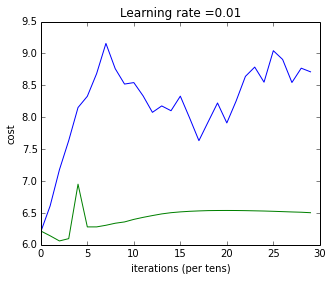

0.01 0.001
Cost after iteration 0: 6.258559
Cost after iteration 100: 6.161002
Cost after iteration 200: 6.148406
Cost after iteration 300: 6.100368
Cost after iteration 400: 6.116625
Cost after iteration 500: 5.948142
Cost after iteration 600: 6.071327
Cost after iteration 700: 5.877959
Cost after iteration 800: 5.964712
Cost after iteration 900: 5.979326
Cost after iteration 1000: 6.071614
Cost after iteration 1100: 6.018675
Cost after iteration 1200: 6.083407
Cost after iteration 1300: 6.053645
Cost after iteration 1400: 6.073369
Cost after iteration 1500: 6.088323
Cost after iteration 1600: 6.115239
Cost after iteration 1700: 6.127853
Cost after iteration 1800: 6.146592
Cost after iteration 1900: 6.159900
Cost after iteration 2000: 6.179464
Cost after iteration 2100: 6.182850
Cost after iteration 2200: 6.199057
Cost after iteration 2300: 6.205181
Cost after iteration 2400: 6.227763
Cost after iteration 2500: 6.228351
Cost after iteration 2600: 6.236844
Cost after iteration 2700: 6.

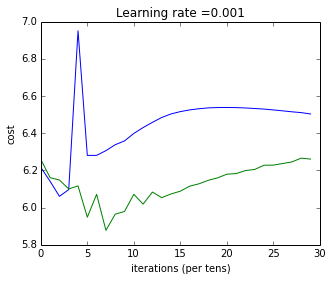

0.01 0.0001
Cost after iteration 0: 6.326889
Cost after iteration 100: 6.212336
Cost after iteration 200: 6.204989
Cost after iteration 300: 6.208140
Cost after iteration 400: 6.215475
Cost after iteration 500: 6.200573
Cost after iteration 600: 6.194868
Cost after iteration 700: 6.193160
Cost after iteration 800: 6.191808
Cost after iteration 900: 6.200596
Cost after iteration 1000: 6.196630
Cost after iteration 1100: 6.191557
Cost after iteration 1200: 6.192590
Cost after iteration 1300: 6.193758
Cost after iteration 1400: 6.183796
Cost after iteration 1500: 6.181005
Cost after iteration 1600: 6.184214
Cost after iteration 1700: 6.179571
Cost after iteration 1800: 6.185398
Cost after iteration 1900: 6.150428
Cost after iteration 2000: 6.199863
Cost after iteration 2100: 6.170987
Cost after iteration 2200: 6.176566
Cost after iteration 2300: 6.147629
Cost after iteration 2400: 6.173028
Cost after iteration 2500: 6.190689
Cost after iteration 2600: 6.175775
Cost after iteration 2700: 6

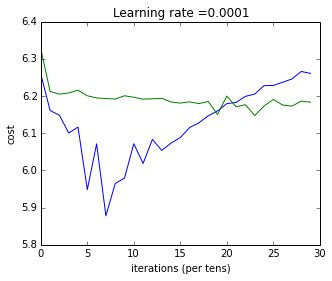

0.01 1e-05
Cost after iteration 0: 6.335406
Cost after iteration 100: 6.228376
Cost after iteration 200: 6.209024
Cost after iteration 300: 6.211670
Cost after iteration 400: 6.227785
Cost after iteration 500: 6.217900
Cost after iteration 600: 6.206269
Cost after iteration 700: 6.213496
Cost after iteration 800: 6.211546
Cost after iteration 900: 6.216082
Cost after iteration 1000: 6.216760
Cost after iteration 1100: 6.214480
Cost after iteration 1200: 6.218507
Cost after iteration 1300: 6.205199
Cost after iteration 1400: 6.216791
Cost after iteration 1500: 6.208419
Cost after iteration 1600: 6.214340
Cost after iteration 1700: 6.208593
Cost after iteration 1800: 6.208222
Cost after iteration 1900: 6.207970
Cost after iteration 2000: 6.213661
Cost after iteration 2100: 6.214103
Cost after iteration 2200: 6.213418
Cost after iteration 2300: 6.202640
Cost after iteration 2400: 6.216046
Cost after iteration 2500: 6.213902
Cost after iteration 2600: 6.207230
Cost after iteration 2700: 6.

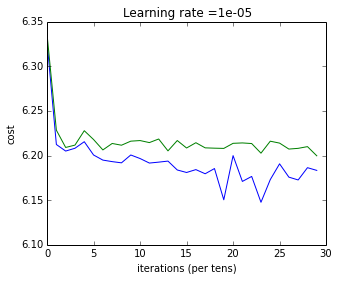

0.005 0.1
Cost after iteration 0: 3.446437
Cost after iteration 100: 3.572807
Cost after iteration 200: 3.811213
Cost after iteration 300: 4.041282
Cost after iteration 400: 4.334452
Cost after iteration 500: 4.402394
Cost after iteration 600: 4.771128
Cost after iteration 700: 5.055800
Cost after iteration 800: 5.440323
Cost after iteration 900: 5.525566
Cost after iteration 1000: 5.538324
Cost after iteration 1100: 5.221530
Cost after iteration 1200: 5.252018
Cost after iteration 1300: 5.492493
Cost after iteration 1400: 5.480732
Cost after iteration 1500: 5.351775
Cost after iteration 1600: 5.229991
Cost after iteration 1700: 5.017968
Cost after iteration 1800: 5.204469
Cost after iteration 1900: 4.969764
Cost after iteration 2000: 4.911772
Cost after iteration 2100: 4.990242
Cost after iteration 2200: 4.926009
Cost after iteration 2300: 4.911771
Cost after iteration 2400: 4.733846
Cost after iteration 2500: 4.803505
Cost after iteration 2600: 4.857103
Cost after iteration 2700: 4.8

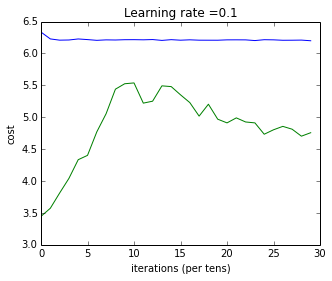

0.005 0.01
Cost after iteration 0: 3.456814
Cost after iteration 100: 3.378179
Cost after iteration 200: 3.156906
Cost after iteration 300: 3.119805
Cost after iteration 400: 3.272355
Cost after iteration 500: 3.137659
Cost after iteration 600: 3.128906
Cost after iteration 700: 3.140643
Cost after iteration 800: 3.151385
Cost after iteration 900: 3.154377
Cost after iteration 1000: 3.172627
Cost after iteration 1100: 3.185993
Cost after iteration 1200: 3.198659
Cost after iteration 1300: 3.205638
Cost after iteration 1400: 3.212590
Cost after iteration 1500: 3.217130
Cost after iteration 1600: 3.220374
Cost after iteration 1700: 3.223156
Cost after iteration 1800: 3.225488
Cost after iteration 1900: 3.226776
Cost after iteration 2000: 3.228015
Cost after iteration 2100: 3.228898
Cost after iteration 2200: 3.229237
Cost after iteration 2300: 3.229215
Cost after iteration 2400: 3.230376
Cost after iteration 2500: 3.229002
Cost after iteration 2600: 3.228480
Cost after iteration 2700: 3.

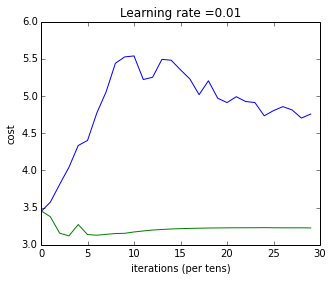

0.005 0.001
Cost after iteration 0: 3.498777
Cost after iteration 100: 3.398481
Cost after iteration 200: 3.375916
Cost after iteration 300: 3.309988
Cost after iteration 400: 3.308429
Cost after iteration 500: 3.114702
Cost after iteration 600: 3.213983
Cost after iteration 700: 2.994992
Cost after iteration 800: 3.058408
Cost after iteration 900: 3.051288
Cost after iteration 1000: 3.130511
Cost after iteration 1100: 3.050717
Cost after iteration 1200: 3.097196
Cost after iteration 1300: 3.051992
Cost after iteration 1400: 3.058815
Cost after iteration 1500: 3.061767
Cost after iteration 1600: 3.075718
Cost after iteration 1700: 3.079771
Cost after iteration 1800: 3.090604
Cost after iteration 1900: 3.094182
Cost after iteration 2000: 3.105936
Cost after iteration 2100: 3.103615
Cost after iteration 2200: 3.113833
Cost after iteration 2300: 3.114312
Cost after iteration 2400: 3.131322
Cost after iteration 2500: 3.127046
Cost after iteration 2600: 3.131252
Cost after iteration 2700: 3

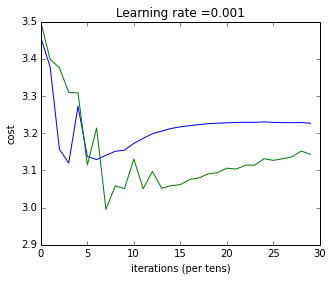

0.005 0.0001
Cost after iteration 0: 3.567006
Cost after iteration 100: 3.452791
Cost after iteration 200: 3.445574
Cost after iteration 300: 3.448821
Cost after iteration 400: 3.456232
Cost after iteration 500: 3.441384
Cost after iteration 600: 3.435711
Cost after iteration 700: 3.434042
Cost after iteration 800: 3.432708
Cost after iteration 900: 3.441474
Cost after iteration 1000: 3.437499
Cost after iteration 1100: 3.432385
Cost after iteration 1200: 3.433395
Cost after iteration 1300: 3.434520
Cost after iteration 1400: 3.424504
Cost after iteration 1500: 3.421613
Cost after iteration 1600: 3.424785
Cost after iteration 1700: 3.419983
Cost after iteration 1800: 3.425705
Cost after iteration 1900: 3.390596
Cost after iteration 2000: 3.439880
Cost after iteration 2100: 3.410853
Cost after iteration 2200: 3.416241
Cost after iteration 2300: 3.387136
Cost after iteration 2400: 3.412312
Cost after iteration 2500: 3.429792
Cost after iteration 2600: 3.414651
Cost after iteration 2700: 

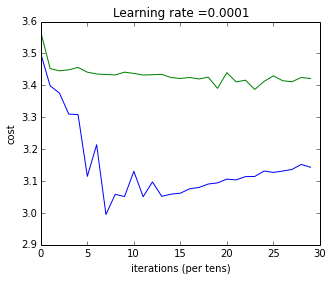

0.005 1e-05
Cost after iteration 0: 3.575510
Cost after iteration 100: 3.468604
Cost after iteration 200: 3.449302
Cost after iteration 300: 3.451980
Cost after iteration 400: 3.468122
Cost after iteration 500: 3.458260
Cost after iteration 600: 3.446650
Cost after iteration 700: 3.453896
Cost after iteration 800: 3.451963
Cost after iteration 900: 3.456515
Cost after iteration 1000: 3.457209
Cost after iteration 1100: 3.454944
Cost after iteration 1200: 3.458986
Cost after iteration 1300: 3.445691
Cost after iteration 1400: 3.457297
Cost after iteration 1500: 3.448938
Cost after iteration 1600: 3.454872
Cost after iteration 1700: 3.449138
Cost after iteration 1800: 3.448779
Cost after iteration 1900: 3.448538
Cost after iteration 2000: 3.454240
Cost after iteration 2100: 3.454693
Cost after iteration 2200: 3.454019
Cost after iteration 2300: 3.443251
Cost after iteration 2400: 3.456667
Cost after iteration 2500: 3.454533
Cost after iteration 2600: 3.447869
Cost after iteration 2700: 3

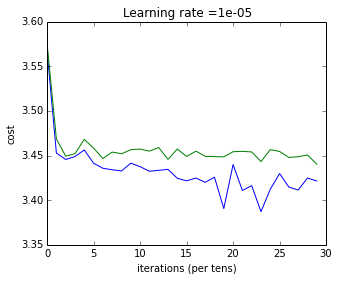

0.001 0.1
Cost after iteration 0: 1.239168
Cost after iteration 100: 1.272976
Cost after iteration 200: 1.267770
Cost after iteration 300: 1.412813
Cost after iteration 400: 1.340088
Cost after iteration 500: 1.173092
Cost after iteration 600: 1.469894
Cost after iteration 700: 1.495615
Cost after iteration 800: 1.411356
Cost after iteration 900: 1.652410
Cost after iteration 1000: 1.204646
Cost after iteration 1100: 1.830883
Cost after iteration 1200: 1.766612
Cost after iteration 1300: 1.834090
Cost after iteration 1400: 1.727385
Cost after iteration 1500: 1.700608
Cost after iteration 1600: 1.757642
Cost after iteration 1700: 1.755376
Cost after iteration 1800: 1.693018
Cost after iteration 1900: 1.654795
Cost after iteration 2000: 1.818609
Cost after iteration 2100: 1.746330
Cost after iteration 2200: 1.709423
Cost after iteration 2300: 1.778875
Cost after iteration 2400: 1.669301
Cost after iteration 2500: 1.737308
Cost after iteration 2600: 1.770628
Cost after iteration 2700: 1.7

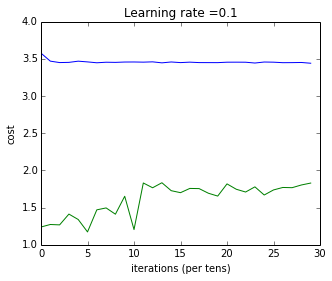

0.001 0.01
Cost after iteration 0: 1.249229
Cost after iteration 100: 1.092180
Cost after iteration 200: 0.836097
Cost after iteration 300: 0.733145
Cost after iteration 400: 0.815013
Cost after iteration 500: 0.678349
Cost after iteration 600: 0.655473
Cost after iteration 700: 0.653812
Cost after iteration 800: 0.647427
Cost after iteration 900: 0.641216
Cost after iteration 1000: 0.644520
Cost after iteration 1100: 0.646903
Cost after iteration 1200: 0.648646
Cost after iteration 1300: 0.647770
Cost after iteration 1400: 0.649380
Cost after iteration 1500: 0.650485
Cost after iteration 1600: 0.652628
Cost after iteration 1700: 0.655796
Cost after iteration 1800: 0.658525
Cost after iteration 1900: 0.659795
Cost after iteration 2000: 0.661137
Cost after iteration 2100: 0.662473
Cost after iteration 2200: 0.663383
Cost after iteration 2300: 0.664194
Cost after iteration 2400: 0.665520
Cost after iteration 2500: 0.665847
Cost after iteration 2600: 0.666186
Cost after iteration 2700: 0.

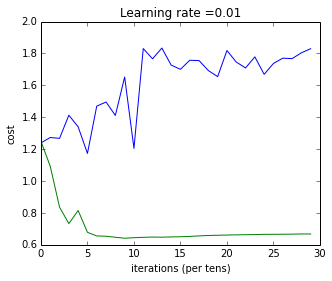

0.001 0.001
Cost after iteration 0: 1.290949
Cost after iteration 100: 1.188420
Cost after iteration 200: 1.158023
Cost after iteration 300: 1.081120
Cost after iteration 400: 1.061290
Cost after iteration 500: 0.846534
Cost after iteration 600: 0.924210
Cost after iteration 700: 0.687432
Cost after iteration 800: 0.729633
Cost after iteration 900: 0.702538
Cost after iteration 1000: 0.765140
Cost after iteration 1100: 0.670149
Cost after iteration 1200: 0.703124
Cost after iteration 1300: 0.644128
Cost after iteration 1400: 0.639782
Cost after iteration 1500: 0.631961
Cost after iteration 1600: 0.637088
Cost after iteration 1700: 0.632309
Cost after iteration 1800: 0.635718
Cost after iteration 1900: 0.632028
Cost after iteration 2000: 0.637645
Cost after iteration 2100: 0.629415
Cost after iteration 2200: 0.634187
Cost after iteration 2300: 0.629478
Cost after iteration 2400: 0.642146
Cost after iteration 2500: 0.633308
Cost after iteration 2600: 0.633334
Cost after iteration 2700: 0

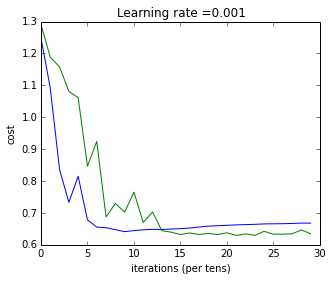

0.001 0.0001
Cost after iteration 0: 1.359100
Cost after iteration 100: 1.245114
Cost after iteration 200: 1.237959
Cost after iteration 300: 1.241248
Cost after iteration 400: 1.248669
Cost after iteration 500: 1.233814
Cost after iteration 600: 1.228130
Cost after iteration 700: 1.226427
Cost after iteration 800: 1.225085
Cost after iteration 900: 1.233794
Cost after iteration 1000: 1.229772
Cost after iteration 1100: 1.224597
Cost after iteration 1200: 1.225517
Cost after iteration 1300: 1.226558
Cost after iteration 1400: 1.216445
Cost after iteration 1500: 1.213464
Cost after iteration 1600: 1.216515
Cost after iteration 1700: 1.211608
Cost after iteration 1800: 1.217185
Cost after iteration 1900: 1.181932
Cost after iteration 2000: 1.231059
Cost after iteration 2100: 1.201865
Cost after iteration 2200: 1.207080
Cost after iteration 2300: 1.177740
Cost after iteration 2400: 1.202780
Cost after iteration 2500: 1.220014
Cost after iteration 2600: 1.204631
Cost after iteration 2700: 

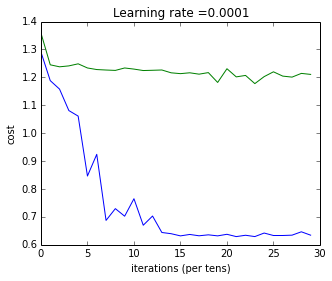

0.001 1e-05
Cost after iteration 0: 1.367593
Cost after iteration 100: 1.260783
Cost after iteration 200: 1.241516
Cost after iteration 300: 1.244216
Cost after iteration 400: 1.260375
Cost after iteration 500: 1.250527
Cost after iteration 600: 1.238928
Cost after iteration 700: 1.246186
Cost after iteration 800: 1.244262
Cost after iteration 900: 1.248824
Cost after iteration 1000: 1.249525
Cost after iteration 1100: 1.247269
Cost after iteration 1200: 1.251318
Cost after iteration 1300: 1.238030
Cost after iteration 1400: 1.249643
Cost after iteration 1500: 1.241290
Cost after iteration 1600: 1.247232
Cost after iteration 1700: 1.241503
Cost after iteration 1800: 1.241147
Cost after iteration 1900: 1.240912
Cost after iteration 2000: 1.246619
Cost after iteration 2100: 1.247077
Cost after iteration 2200: 1.246407
Cost after iteration 2300: 1.235642
Cost after iteration 2400: 1.249063
Cost after iteration 2500: 1.246932
Cost after iteration 2600: 1.240272
Cost after iteration 2700: 1

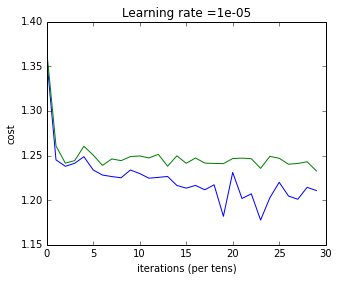

0.0005 0.1
Cost after iteration 0: 0.963248
Cost after iteration 100: 0.813508
Cost after iteration 200: 1.047748
Cost after iteration 300: 1.083220
Cost after iteration 400: 1.040634
Cost after iteration 500: 0.942922
Cost after iteration 600: 1.060296
Cost after iteration 700: 1.047088
Cost after iteration 800: 1.006105
Cost after iteration 900: 1.119648
Cost after iteration 1000: 0.966469
Cost after iteration 1100: 0.921890
Cost after iteration 1200: 0.940747
Cost after iteration 1300: 1.088975
Cost after iteration 1400: 0.967708
Cost after iteration 1500: 0.969072
Cost after iteration 1600: 0.942421
Cost after iteration 1700: 1.006385
Cost after iteration 1800: 0.967225
Cost after iteration 1900: 0.926987
Cost after iteration 2000: 1.083442
Cost after iteration 2100: 1.004773
Cost after iteration 2200: 0.965296
Cost after iteration 2300: 1.046020
Cost after iteration 2400: 0.860867
Cost after iteration 2500: 1.003577
Cost after iteration 2600: 1.043372
Cost after iteration 2700: 1.

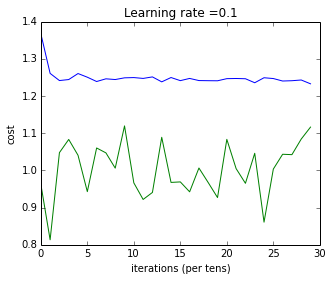

0.0005 0.01
Cost after iteration 0: 0.973280
Cost after iteration 100: 0.833868
Cost after iteration 200: 0.541343
Cost after iteration 300: 0.428926
Cost after iteration 400: 0.510233
Cost after iteration 500: 0.370774
Cost after iteration 600: 0.347151
Cost after iteration 700: 0.344446
Cost after iteration 800: 0.340396
Cost after iteration 900: 0.323709
Cost after iteration 1000: 0.325024
Cost after iteration 1100: 0.325035
Cost after iteration 1200: 0.325618
Cost after iteration 1300: 0.323831
Cost after iteration 1400: 0.324534
Cost after iteration 1500: 0.324515
Cost after iteration 1600: 0.324750
Cost after iteration 1700: 0.325067
Cost after iteration 1800: 0.325660
Cost after iteration 1900: 0.325803
Cost after iteration 2000: 0.326179
Cost after iteration 2100: 0.326690
Cost after iteration 2200: 0.326892
Cost after iteration 2300: 0.327136
Cost after iteration 2400: 0.329053
Cost after iteration 2500: 0.327677
Cost after iteration 2600: 0.327819
Cost after iteration 2700: 0

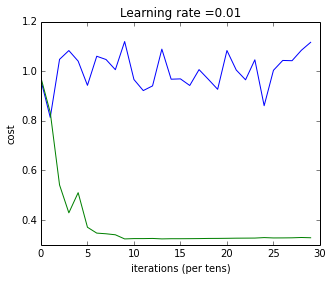

0.0005 0.001
Cost after iteration 0: 1.014971
Cost after iteration 100: 0.912131
Cost after iteration 200: 0.881830
Cost after iteration 300: 0.801660
Cost after iteration 400: 0.779739
Cost after iteration 500: 0.562846
Cost after iteration 600: 0.637012
Cost after iteration 700: 0.397860
Cost after iteration 800: 0.437890
Cost after iteration 900: 0.408651
Cost after iteration 1000: 0.458896
Cost after iteration 1100: 0.371114
Cost after iteration 1200: 0.402377
Cost after iteration 1300: 0.342533
Cost after iteration 1400: 0.336989
Cost after iteration 1500: 0.327221
Cost after iteration 1600: 0.332241
Cost after iteration 1700: 0.325924
Cost after iteration 1800: 0.327685
Cost after iteration 1900: 0.323891
Cost after iteration 2000: 0.328874
Cost after iteration 2100: 0.319325
Cost after iteration 2200: 0.323361
Cost after iteration 2300: 0.318203
Cost after iteration 2400: 0.330344
Cost after iteration 2500: 0.320792
Cost after iteration 2600: 0.320256
Cost after iteration 2700: 

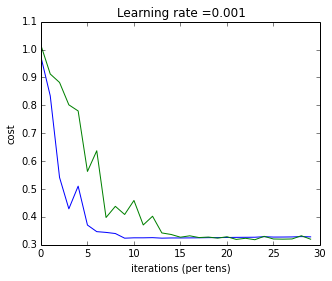

0.0005 0.0001
Cost after iteration 0: 1.083112
Cost after iteration 100: 0.969151
Cost after iteration 200: 0.962002
Cost after iteration 300: 0.965287
Cost after iteration 400: 0.972713
Cost after iteration 500: 0.957860
Cost after iteration 600: 0.952170
Cost after iteration 700: 0.950466
Cost after iteration 800: 0.949087
Cost after iteration 900: 0.957817
Cost after iteration 1000: 0.953777
Cost after iteration 1100: 0.948636
Cost after iteration 1200: 0.949503
Cost after iteration 1300: 0.950525
Cost after iteration 1400: 0.940392
Cost after iteration 1500: 0.937403
Cost after iteration 1600: 0.940388
Cost after iteration 1700: 0.935534
Cost after iteration 1800: 0.941061
Cost after iteration 1900: 0.905797
Cost after iteration 2000: 0.954916
Cost after iteration 2100: 0.925672
Cost after iteration 2200: 0.930888
Cost after iteration 2300: 0.901525
Cost after iteration 2400: 0.926495
Cost after iteration 2500: 0.943761
Cost after iteration 2600: 0.928336
Cost after iteration 2700:

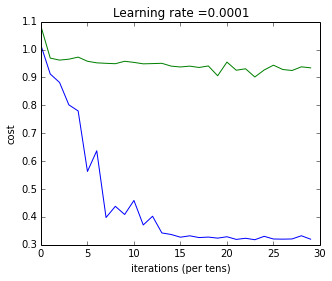

0.0005 1e-05
Cost after iteration 0: 1.091603
Cost after iteration 100: 0.984805
Cost after iteration 200: 0.965542
Cost after iteration 300: 0.968245
Cost after iteration 400: 0.984406
Cost after iteration 500: 0.974559
Cost after iteration 600: 0.962962
Cost after iteration 700: 0.970220
Cost after iteration 800: 0.968297
Cost after iteration 900: 0.972860
Cost after iteration 1000: 0.973562
Cost after iteration 1100: 0.971307
Cost after iteration 1200: 0.975357
Cost after iteration 1300: 0.962069
Cost after iteration 1400: 0.973683
Cost after iteration 1500: 0.965331
Cost after iteration 1600: 0.971272
Cost after iteration 1700: 0.965544
Cost after iteration 1800: 0.965189
Cost after iteration 1900: 0.964953
Cost after iteration 2000: 0.970661
Cost after iteration 2100: 0.971119
Cost after iteration 2200: 0.970450
Cost after iteration 2300: 0.959686
Cost after iteration 2400: 0.973106
Cost after iteration 2500: 0.970976
Cost after iteration 2600: 0.964315
Cost after iteration 2700: 

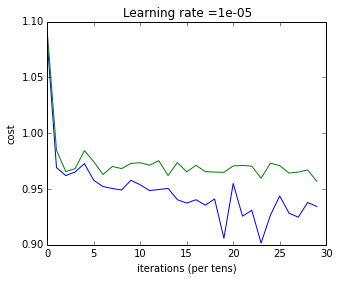

0.0001 0.1
Cost after iteration 0: 0.742510
Cost after iteration 100: 0.655106
Cost after iteration 200: 0.759151
Cost after iteration 300: 0.653545
Cost after iteration 400: 0.619360
Cost after iteration 500: 0.743948
Cost after iteration 600: 0.504090
Cost after iteration 700: 0.395866
Cost after iteration 800: 0.367361
Cost after iteration 900: 0.340998
Cost after iteration 1000: 0.498407
Cost after iteration 1100: 0.250882
Cost after iteration 1200: 0.211810
Cost after iteration 1300: 0.477844
Cost after iteration 1400: 0.500474
Cost after iteration 1500: 0.425193
Cost after iteration 1600: 0.440290
Cost after iteration 1700: 0.209104
Cost after iteration 1800: 0.423597
Cost after iteration 1900: 0.250041
Cost after iteration 2000: 0.326479
Cost after iteration 2100: 0.440609
Cost after iteration 2200: 0.345240
Cost after iteration 2300: 0.383268
Cost after iteration 2400: 0.326618
Cost after iteration 2500: 0.440674
Cost after iteration 2600: 0.459235
Cost after iteration 2700: 0.

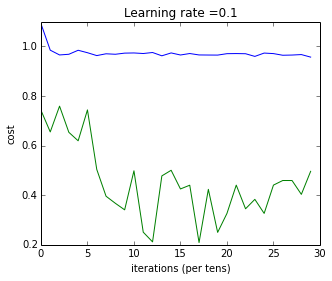

0.0001 0.01
Cost after iteration 0: 0.752521
Cost after iteration 100: 0.600658
Cost after iteration 200: 0.306496
Cost after iteration 300: 0.212021
Cost after iteration 400: 0.267206
Cost after iteration 500: 0.126220
Cost after iteration 600: 0.099981
Cost after iteration 700: 0.096033
Cost after iteration 800: 0.093892
Cost after iteration 900: 0.080388
Cost after iteration 1000: 0.082909
Cost after iteration 1100: 0.077194
Cost after iteration 1200: 0.071328
Cost after iteration 1300: 0.068000
Cost after iteration 1400: 0.067559
Cost after iteration 1500: 0.066551
Cost after iteration 1600: 0.066062
Cost after iteration 1700: 0.066259
Cost after iteration 1800: 0.066260
Cost after iteration 1900: 0.066005
Cost after iteration 2000: 0.066017
Cost after iteration 2100: 0.066289
Cost after iteration 2200: 0.066230
Cost after iteration 2300: 0.066177
Cost after iteration 2400: 0.067441
Cost after iteration 2500: 0.066339
Cost after iteration 2600: 0.066316
Cost after iteration 2700: 0

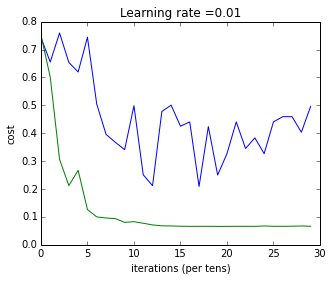

0.0001 0.001
Cost after iteration 0: 0.794188
Cost after iteration 100: 0.691219
Cost after iteration 200: 0.659656
Cost after iteration 300: 0.579608
Cost after iteration 400: 0.555572
Cost after iteration 500: 0.336044
Cost after iteration 600: 0.408794
Cost after iteration 700: 0.166729
Cost after iteration 800: 0.204995
Cost after iteration 900: 0.175426
Cost after iteration 1000: 0.233359
Cost after iteration 1100: 0.133944
Cost after iteration 1200: 0.163534
Cost after iteration 1300: 0.101946
Cost after iteration 1400: 0.094724
Cost after iteration 1500: 0.084684
Cost after iteration 1600: 0.087184
Cost after iteration 1700: 0.081013
Cost after iteration 1800: 0.082607
Cost after iteration 1900: 0.077322
Cost after iteration 2000: 0.081386
Cost after iteration 2100: 0.071633
Cost after iteration 2200: 0.075063
Cost after iteration 2300: 0.069443
Cost after iteration 2400: 0.080552
Cost after iteration 2500: 0.070935
Cost after iteration 2600: 0.070014
Cost after iteration 2700: 

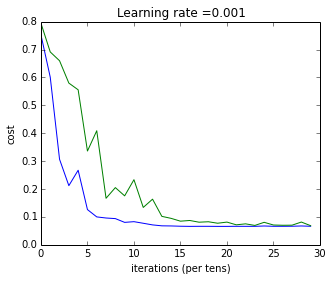

0.0001 0.0001
Cost after iteration 0: 0.862321
Cost after iteration 100: 0.748381
Cost after iteration 200: 0.741236
Cost after iteration 300: 0.744522
Cost after iteration 400: 0.751946
Cost after iteration 500: 0.737091
Cost after iteration 600: 0.731397
Cost after iteration 700: 0.729691
Cost after iteration 800: 0.728307
Cost after iteration 900: 0.737024
Cost after iteration 1000: 0.732977
Cost after iteration 1100: 0.727810
Cost after iteration 1200: 0.728694
Cost after iteration 1300: 0.729708
Cost after iteration 1400: 0.719560
Cost after iteration 1500: 0.716552
Cost after iteration 1600: 0.719520
Cost after iteration 1700: 0.714610
Cost after iteration 1800: 0.720177
Cost after iteration 1900: 0.684881
Cost after iteration 2000: 0.733975
Cost after iteration 2100: 0.704714
Cost after iteration 2200: 0.709890
Cost after iteration 2300: 0.680535
Cost after iteration 2400: 0.705496
Cost after iteration 2500: 0.722716
Cost after iteration 2600: 0.707248
Cost after iteration 2700:

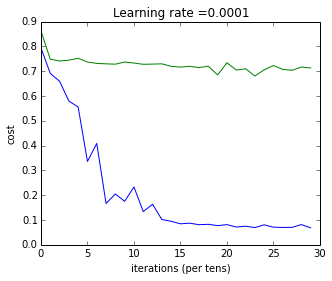

0.0001 1e-05
Cost after iteration 0: 0.870811
Cost after iteration 100: 0.764022
Cost after iteration 200: 0.744763
Cost after iteration 300: 0.747468
Cost after iteration 400: 0.763630
Cost after iteration 500: 0.753785
Cost after iteration 600: 0.742188
Cost after iteration 700: 0.749448
Cost after iteration 800: 0.747525
Cost after iteration 900: 0.752089
Cost after iteration 1000: 0.752791
Cost after iteration 1100: 0.750537
Cost after iteration 1200: 0.754587
Cost after iteration 1300: 0.741299
Cost after iteration 1400: 0.752914
Cost after iteration 1500: 0.744562
Cost after iteration 1600: 0.750504
Cost after iteration 1700: 0.744775
Cost after iteration 1800: 0.744421
Cost after iteration 1900: 0.744186
Cost after iteration 2000: 0.749895
Cost after iteration 2100: 0.750352
Cost after iteration 2200: 0.749683
Cost after iteration 2300: 0.738920
Cost after iteration 2400: 0.752338
Cost after iteration 2500: 0.750209
Cost after iteration 2600: 0.743549
Cost after iteration 2700: 

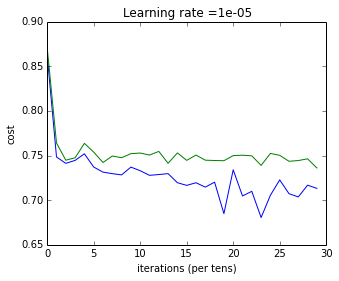

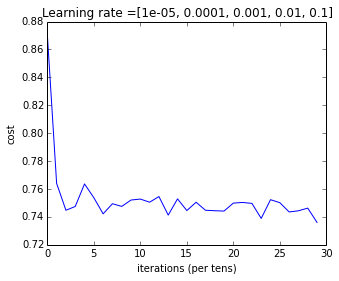

In [39]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
lambds = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for la in lambds:
    for l_r in reversed(learning_rates):
        print 'lambd: ' + la, 'learning_rate: ' + l_r
        parameters, costs = L_layer_model(train_x, train_y, layers_dims,
                           optimizer = "gd", 
                           lambd = la, 
                           mini_batch_size = 64, 
                           beta = 0.9,
                           beta1 = 0.99, 
                           beta2 = 0.999,  
                           epsilon = 1e-8, 
                           learning_rate = l_r, 
                           num_epochs = 3000,
                           print_cost = True)


    # plot the cost
        plt.plot(np.squeeze(costs))
    
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rates))
plt.show()

In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward_with_regularization(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
#     print ("predictions: " + str(p))
#     print ("true labels: " + str(y))
    print("Accuracy: "  + str(1. * np.sum(p == y)/ m))
        
    return p


In [ ]:
train_acc = predict(train_x, train_y, parameters)
train_acc

In [ ]:
test_acc = predict(test_x, test_y, parameters)
test_acc

In [3]:
from sklearn.metrics.scorer import make_scorer

def custom_loss_func(X, Y, lambd):
    AL, caches = L_model_forward_with_regularization(X, parameters)
    cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
    return cost


custom_scorer = make_scorer(custom_loss_func, greater_is_better=False)





In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin

class GeneralNetworkClassifier(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    def __init__(self, layers_dims, optimizer = "gd", hidden_activation = "relu", output_activation = "sigmoid", lambd = 0.01, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, learning_rate = 0.0075, num_epochs = 3000):
        """
        Called when initializing the classifier
        """
        self.layers_dims = layers_dims
        self.optimizer = optimizer

        # THIS IS WRONG! Parameters should have same name as attributes
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.lambd = lambd
        self.mini_batch_size = mini_batch_size
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs


    def fit(self, X, Y):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """
        np.random.seed(1)
        self.costs_ = []                         # keep track of cost
        seed = 10
        t = 0
        # Parameters initialization.
        ### START CODE HERE ###
        parameters = initialize_parameters_he(layers_dims)

        # Initialize the optimizer
        if optimizer == "gd":
            pass # no initialization required for gradient descent
        elif optimizer == "momentum":
            v = initialize_velocity(parameters)
        elif optimizer == "adam":
            v, s = initialize_adam(parameters)
        ### END CODE HERE ###

        for i in range(num_epochs):

            # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
            seed = seed + 1
            minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
                ### START CODE HERE ### (≈ 1 line of code)
    #             print minibatch_X.shape, len(parameters)
                AL, caches = L_model_forward_with_regularization(minibatch_X, parameters)
                ### END CODE HERE ###

    #             print "------------compute cost-------------"
                # Compute cost.
                ### START CODE HERE ### (≈ 1 line of code)
                cost = compute_cost_with_regularization(AL, minibatch_Y, parameters, lambd)
                ### END CODE HERE ###

                # Backward propagation.
                ### START CODE HERE ### (≈ 1 line of code)
                grads = L_model_backward_with_regularization(AL, minibatch_Y, caches, hidden_activation, output_activation, lambd)
                ### END CODE HERE ###

                # Update parameters.
                ### START CODE HERE ### (≈ 1 line of code)
                if optimizer == "gd":
                    parameters = update_parameters_with_gd(parameters, grads, learning_rate)
                elif optimizer == "momentum":
                    parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
                elif optimizer == "adam":
                    t = t + 1 # Adam counter
                    parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                                   t, learning_rate, beta1, beta2,  epsilon)
                ### END CODE HERE ###

            if print_cost and i % 100 == 0:
                self.costs_.append(cost)
        self.parameters = parameters
        return self

    def score(self, X, Y):
        AL, caches = L_model_forward_with_regularization(X, parameters)
        cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
        return -cost 